In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Reading Training Data

## 1.1 Users

In [ ]:
# load train and test users data
train_users = pd.read_csv("train_users.csv")
test_users = pd.read_csv("test_users.csv")


In [9]:
# check the replication of the users in the train and test data
train_users.shape, train_users.user_id.nunique() # no replicates for the users

((256475, 1), 256475)

In [10]:
test_users.shape, test_users.user_id.nunique() # no replicates for the users

((1333, 1), 1333)

In [11]:
# does test users are all in train users?
test_users.user_id.isin(train_users.user_id).sum() # all test users are in train

1333

In [12]:
train_users.tail(2)

,user_id
256473,270589
256474,270590


## 1.2 Items

In [13]:
# load train and test items data
train_items = pd.read_csv("train_items.csv")
test_items = pd.read_csv("test_items.csv")


In [14]:
# overview of the train items
train_items.head(2)

,item_ID,item_name,brand,channel,unit_price,category,size,color,discount,gender,...,brand_location_map,materials_map,sex,country_size,country_in_stock,tag,price_range,country,style_50,color_50
0,1001920,Fendi女子皮制鞋12184-X3474,FENDI,17,299.0,单鞋,39,NaN,0.059443,女,...,NaN,NaN,NaN,意大利 (IT),NaN,奢华&经典&现代,5.0,意大利 (IT),奢华,NaN
1,1003191,【自营】BCBG-MAXAZRIA女士皮制手提书包 【特卖货品，缺货退款，延迟发货见谅】,BCBG,15,89.0,手提包,30*26*22,西瓜红色,0.032014,女,...,NaN,NaN,NaN,NaN,NaN,高端&时尚&女性化,NaN,NaN,优雅,红色系列


In [10]:
# check the replication of the items in the train and test data
train_items.shape, train_items.item_ID.nunique() # no replicates for the items

((99893, 24), 99893)

In [11]:
test_items.shape, test_items.item_ID.nunique() # no replicates for the items

((11510, 24), 11510)

In [12]:
# missing values for both train and test, combined into one table
missing_values = pd.concat([train_items.isnull().mean()*100, test_items.isnull().mean()*100], axis=1).round(2)
missing_values.columns = ['train_items_missing', 'test_items_missing']
missing_values

,train_items_missing,test_items_missing
item_ID,0.00,0.00
item_name,0.00,0.00
brand,0.00,0.00
channel,0.00,0.00
unit_price,0.00,0.00
category,0.00,0.00
size,0.16,0.01
color,0.20,0.02
discount,0.00,0.00
gender,0.00,0.00


C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29649 (\N{CJK UNIFIED IDEOGRAPH-73D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39591 (\N{CJK UNIFIED IDEOGRAPH-9AA7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

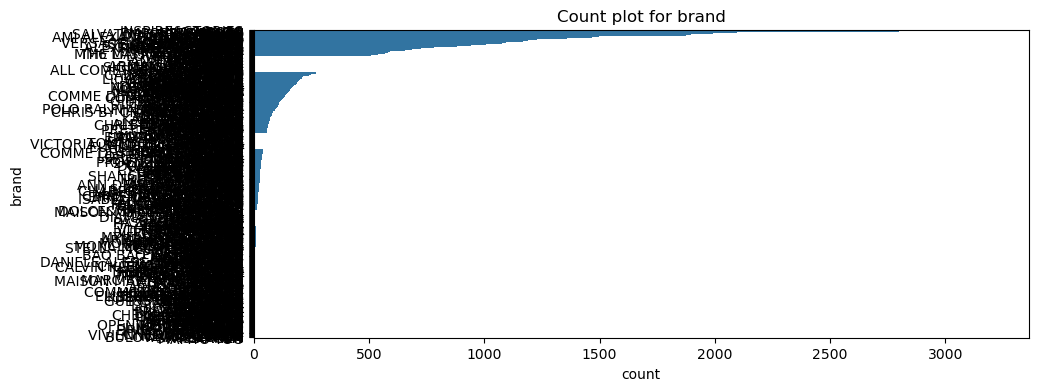

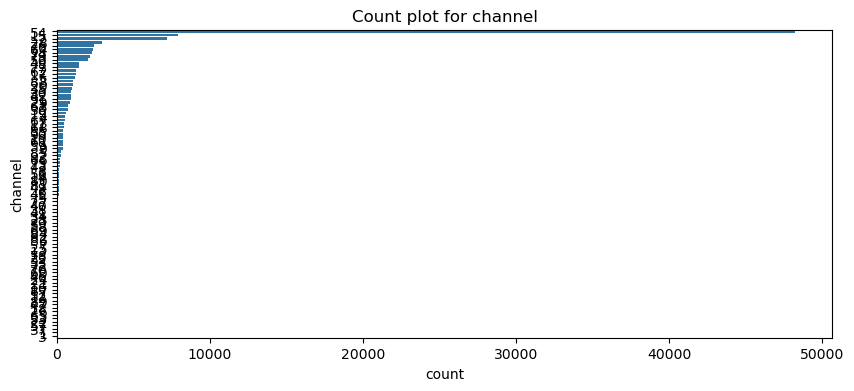

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24676 (\N{CJK UNIFIED IDEOGRAPH-6064}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36816 (\N{CJK UNIFIED IDEOGRAPH-8FD0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38795 (\N{CJK UNIFIED IDEOGRAPH-978B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

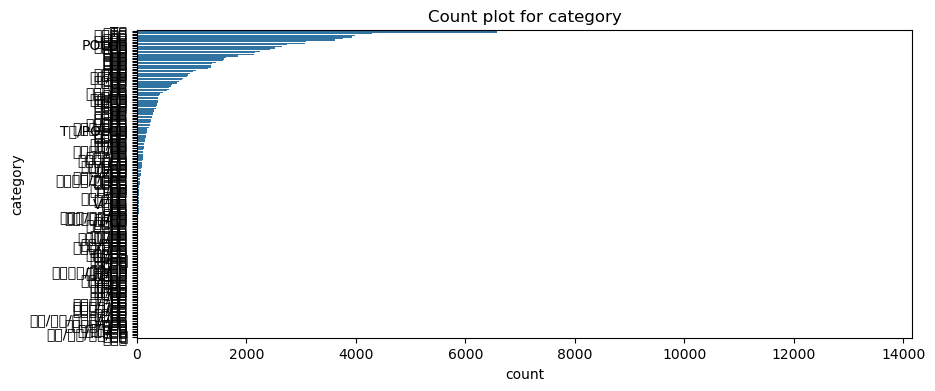

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34013 (\N{CJK UNIFIED IDEOGRAPH-84DD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

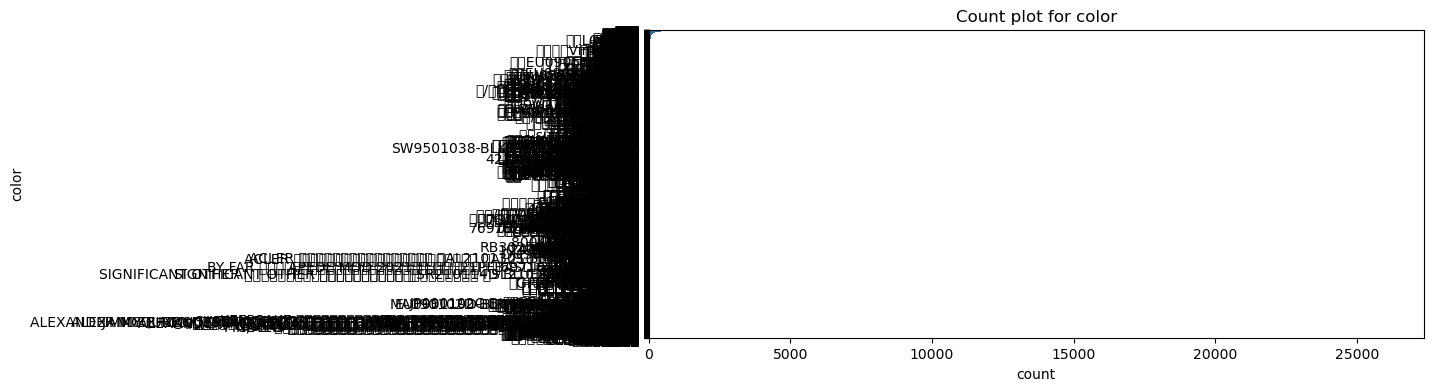

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


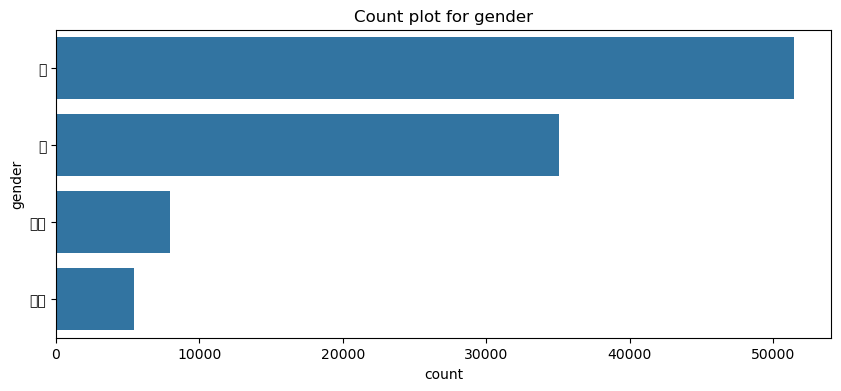

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35013 (\N{CJK UNIFIED IDEOGRAPH-88C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38795 (\N{CJK UNIFIED IDEOGRAPH-978B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38772 (\N{CJK UNIFIED IDEOGRAPH-9774}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

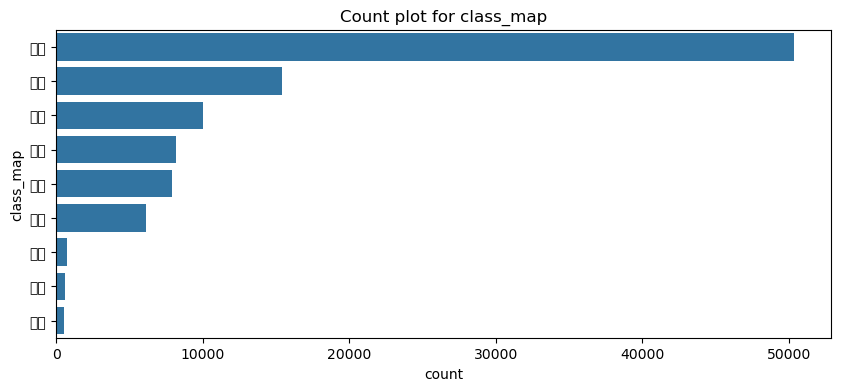

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

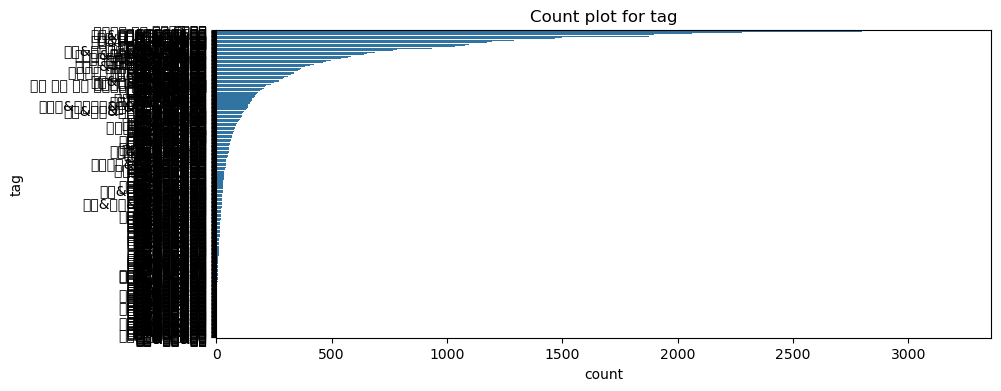

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22882 (\N{CJK UNIFIED IDEOGRAPH-5962}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

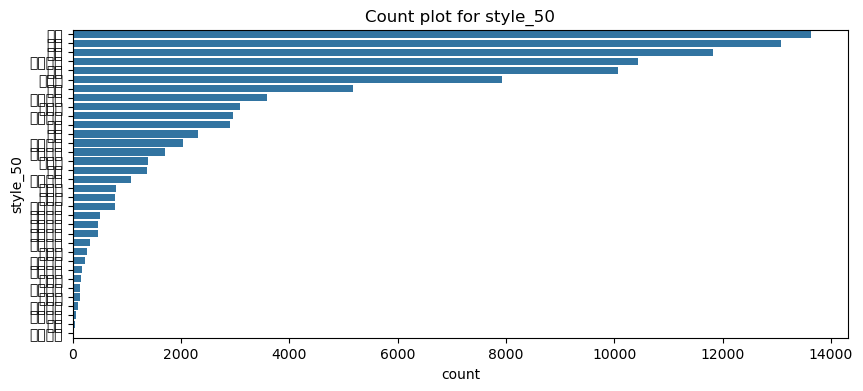

C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EFGUV\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

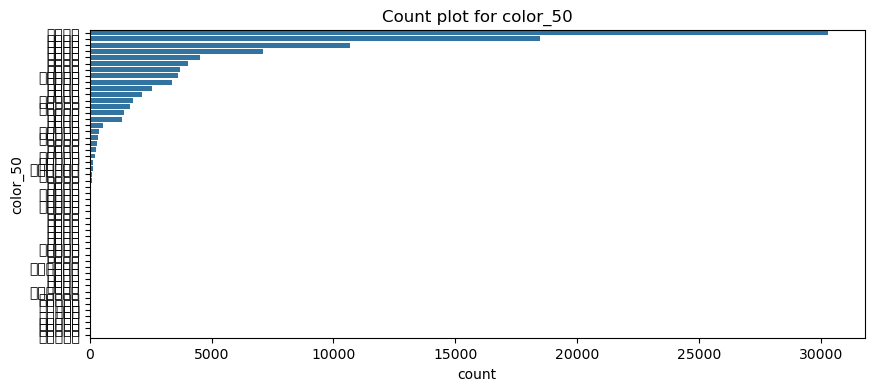

In [21]:
columns_to_count = ['brand', 'channel', 'category', 'color', 'gender', 'class_map', 'tag', 'style_50', 'color_50']
for col in columns_to_count:
	plt.figure(figsize=(10, 4))
	sns.countplot(y=col, data=train_items, order=train_items[col].value_counts().index)
	plt.title(f'Count plot for {col}')
	plt.show()


## 1.3 Interactions

In [13]:
# load interactions
train_interactions = pd.read_csv("train_interactions.csv")
train_interactions.head()

,user_id,item_ID,order_time
0,209227,1595587,2024-03-14
1,243637,1639001,2024-03-14
2,265503,1675222,2024-03-14
3,183614,1662640,2024-03-14
4,188753,1662540,2024-03-14


# 2. Featurization

## 2.1 Item Features

In this tutorial, we only use unit_price and discount as features. You can try more.

In [14]:
train_item_feas = train_items[["item_ID", "unit_price", "discount"]]

Missing value imputation.

In [15]:
train_item_feas = train_item_feas.fillna(train_item_feas.mean())

In [16]:
train_item_feas.head(2)

,item_ID,unit_price,discount
0,1001920,299.0,0.059443
1,1003191,89.0,0.032014


## 2.2 User Features

An user can be represented with the averaged price and discount of the items he/she purchased.

In [23]:
train_user_feas = train_interactions.drop("order_time", axis=1)

In [24]:
train_user_feas.head(2)

,user_id,item_ID
0,209227,1595587
1,243637,1639001


In [25]:
train_user_feas = train_user_feas.merge(train_item_feas, on="item_ID")

In [27]:
train_user_feas.head(2)

,user_id,item_ID,unit_price,discount
0,209227,1595587,2880.0,0.600000
1,243637,1639001,519.0,0.524242


In [28]:
train_user_feas = train_user_feas.drop("item_ID", axis=1)

In [29]:
train_user_feas.head(2)

,user_id,unit_price,discount
0,209227,2880.0,0.600000
1,243637,519.0,0.524242


In [30]:
train_user_feas = train_user_feas.groupby("user_id", as_index=False).mean()

In [31]:
train_user_feas.head(2)

,user_id,unit_price,discount
0,1,1211.494000,0.643710
1,2,895.027108,0.310057


# 3. Labeling

## 3.1 Positive Labels

All the happened purchases are positive.

In [32]:
pos_samples = train_interactions.drop("order_time", axis=1)

In [33]:
pos_samples.head(2)

,user_id,item_ID
0,209227,1595587
1,243637,1639001


In [34]:
pos_samples["label"] = 1

In [35]:
pos_samples.head(2)

,user_id,item_ID,label
0,209227,1595587,1
1,243637,1639001,1


## 3.2 Negative Sampling

We can randomly pair an user and an item and assume this purchase will not happen (negative data). Definitly some of these negatively labeled data would be the same as some positive data. We assume the amount would be limited and it would not hurt the result.

In [36]:
pos_num = len(pos_samples)

In [37]:
import random

In [38]:
neg_samples = {"user_id":[], "item_ID":[]}
for i in range(pos_num):
    uid = random.choice(train_users["user_id"])
    neg_samples["user_id"].append(uid)
    
    iid = random.choice(train_items["item_ID"])
    neg_samples["item_ID"].append(iid)

In [39]:
neg_samples = pd.DataFrame(neg_samples)

In [40]:
neg_samples["label"] = 0

In [41]:
neg_samples.head(2)

,user_id,item_ID,label
0,264008,1635057,0
1,49660,1514481,0


In [43]:
len(neg_samples), len(pos_samples)

(613807, 613807)

# 4. Training Data Preparation

## 4.1 Concatenation

In [44]:
train_data = pd.concat([pos_samples, neg_samples]).reset_index(drop=True)

In [45]:
train_data.head()

,user_id,item_ID,label
0,209227,1595587,1
1,243637,1639001,1
2,265503,1675222,1
3,183614,1662640,1
4,188753,1662540,1


## 4.2 Adding features

In [46]:
train_data = train_data.merge(train_item_feas, on="item_ID")

In [47]:
train_data.head()

,user_id,item_ID,label,unit_price,discount
0,209227,1595587,1,2880.0,0.600000
1,243637,1639001,1,519.0,0.524242
2,265503,1675222,1,899.0,0.359600
3,183614,1662640,1,985.0,0.299392
4,188753,1662540,1,199.0,0.406122


In [48]:
train_data = train_data.merge(train_user_feas, on="user_id", suffixes=("_item", "_user"))

In [49]:
train_data.head()

,user_id,item_ID,label,unit_price_item,discount_item,unit_price_user,discount_user
0,209227,1595587,1,2880.0,0.600000,2533.333333,0.682828
1,243637,1639001,1,519.0,0.524242,519.000000,0.524242
2,265503,1675222,1,899.0,0.359600,643.000000,0.233700
3,183614,1662640,1,985.0,0.299392,632.941364,0.393443
4,188753,1662540,1,199.0,0.406122,199.000000,0.406122


## 4.3 Splitting Features and Labels

In [50]:
y_train = train_data["label"]

In [51]:
features = list(train_data.columns)
features.remove("label")
features.remove("user_id")
features.remove("item_ID")

In [52]:
X_train = train_data[features]

# 5. Modeling

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()

In [55]:
model = lr.fit(X_train, y_train)

# 6. Test Dataset Preparation

## 6.1 Item Features

In [ ]:
# load test items 
test_items = pd.read_csv("test_items.csv")

In [57]:
test_items.shape, test_items.head(2)

((11510, 24),
    item_ID                                          item_name          brand  \
 0  1657680  Alexia Sandra 牛仔系列 女士简约松紧腰牛仔长裤【477948NZ4K9605 ...  ALEXIA SANDRA   
 1  1525546      CAMPER 女士经典黑色简约日常圆头针扣系带休闲凉鞋，【K200573-012 36】,         CAMPER   
 
    channel  unit_price category size color  discount gender  ...  \
 0       54      871.46      牛仔裤    S    蓝色  0.738525      女  ...   
 1       54      635.34       凉鞋   36    黑色  0.635976      女  ...   
 
   brand_location_map  materials_map  sex country_size country_in_stock  \
 0                NaN            NaN  NaN          NaN              NaN   
 1              SPAIN    牛皮革, 真皮, 其它    女          NaN            SPAIN   
 
                tag price_range   country style_50 color_50  
 0        现代&女性化&精致         NaN       NaN       优雅     蓝色系列  
 1  后现代&返璞归真&地中海&艺术         3.0  意大利 (IT)      户外风     黑色系列  
 
 [2 rows x 24 columns])

In [58]:
test_item_feas = test_items[["item_ID", "unit_price", "discount"]]

In [59]:
test_item_feas = test_item_feas.fillna(train_item_feas.mean())

In [60]:
test_item_feas.head(2)

,item_ID,unit_price,discount
0,1657680,871.46,0.738525
1,1525546,635.34,0.635976


## 6.2 User Features

In [61]:
test_users = pd.read_csv("test_users.csv")

In [62]:
test_users.head(2)

,user_id
0,1
1,2


In [63]:
test_user_feas = test_users.merge(train_user_feas, how="right", on="user_id")

In [64]:
test_user_feas.head()

,user_id,unit_price,discount
0,1,1211.494000,0.643710
1,2,895.027108,0.310057
2,3,3002.775556,0.461823
3,4,858.140791,0.251688
4,5,1453.974430,0.337430


# 7. Recommend items for one user

## 7.1 Create interaction data for an user

In [69]:
uid = 1

In [70]:
test_interactions = pd.DataFrame()
test_interactions["item_ID"] = test_item_feas["item_ID"]
test_interactions["user_id"] = uid

In [71]:
test_interactions.head(2)

,item_ID,user_id
0,1657680,1
1,1525546,1


## 7.2 Add features.

In [72]:
test_data = test_interactions.merge(test_item_feas, on="item_ID")

In [73]:
test_data = test_data.merge(test_user_feas, on="user_id", suffixes=("_item", "_user"))

In [74]:
test_data.head()

,item_ID,user_id,unit_price_item,discount_item,unit_price_user,discount_user
0,1657680,1,871.46,0.738525,1211.494,0.64371
1,1525546,1,635.34,0.635976,1211.494,0.64371
2,1525194,1,400.26,0.588618,1211.494,0.64371
3,1523948,1,358.62,0.587902,1211.494,0.64371
4,1534750,1,1432.53,0.761984,1211.494,0.64371


## 7.3 Prepare for model predicting

In [75]:
features = list(test_data.columns)
features.remove("item_ID")
features.remove("user_id")

In [76]:
test_X = test_data[features]

In [77]:
test_X.head(2)

,unit_price_item,discount_item,unit_price_user,discount_user
0,871.46,0.738525,1211.494,0.64371
1,635.34,0.635976,1211.494,0.64371


## 7.4 Predict the probabilities that the purchases would happen

In [78]:
y_pred = lr.predict_proba(test_X)[:, 1]

In [79]:
y_pred

array([0.5206382 , 0.5236849 , 0.53095793, ..., 0.45603745, 0.39583528,
       0.42659748])

## 7.5 Get the 20 items which would most possibily purchased

In [80]:
test_data["score"] = y_pred

In [81]:
test_data.head(2)

,item_ID,user_id,unit_price_item,discount_item,unit_price_user,discount_user,score
0,1657680,1,871.46,0.738525,1211.494,0.64371,0.520638
1,1525546,1,635.34,0.635976,1211.494,0.64371,0.523685


In [82]:
test_data = test_data.sort_values(by=["score"], axis=0, ascending=False)

In [83]:
test_data.head(2)

,item_ID,user_id,unit_price_item,discount_item,unit_price_user,discount_user,score
823,1664858,1,88.9,0.998876,1211.494,0.64371,0.576818
2223,1604949,1,99.0,1.000000,1211.494,0.64371,0.576443


In [84]:
list(test_data["item_ID"][:20])

[1664858,
 1604949,
 1604950,
 1604872,
 1610209,
 1610210,
 1674976,
 1674958,
 1674959,
 1604951,
 1604909,
 1604952,
 1674981,
 1690433,
 1654976,
 1664845,
 1671026,
 1676196,
 1676199,
 1607974]

# 8. Get predictions for all users

## 8.1 Recommend items to all the users

Put all the codes relevant to one-user recommendation into a function.

In [85]:
def get_top_K(uid, model, test_user_feas, test_item_feas, features, K=20):
    test_feas = test_user_feas[test_user_feas["user_id"] == uid]
    
    test_interactions = pd.DataFrame()
    test_interactions["item_ID"] = test_item_feas["item_ID"]
    test_interactions["user_id"] = uid
    
    test_data = test_interactions
    test_data = test_data.merge(test_item_feas, on="item_ID")
    test_data = test_data.merge(test_user_feas, on="user_id", suffixes=("_item", "_user"))
    
    test_X = test_data[features]
    
    y_pred = model.predict_proba(test_X)[:, 1]
    
    test_data["score"] = y_pred
    
    top_K = test_data.sort_values(by=["score"], axis=0, ascending=False)["item_ID"][:K]
    
    return list(top_K)

In [87]:
results = []
for uid in test_users["user_id"]:
    result = get_top_K(uid, lr, test_user_feas, test_item_feas, features)
    result = [uid] + result
    results.append(result)

## 8.2 Load the results into a dataframe

In [68]:
df = pd.DataFrame(results)

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974
1,2,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974
2,4,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974
3,50,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974
4,65,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974


In [70]:
cols = ["user_id"]
for i in range(20):
    cols.append("item_{}".format(i + 1))

In [71]:
df.columns = cols

In [72]:
df.head(2)

,user_id,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,1,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974
1,2,1664858,1604949,1604950,1604872,1610209,1610210,1674976,1674959,1674958,...,1604909,1604951,1674981,1690433,1654976,1671026,1664845,1676199,1676196,1607974


## 8.3 Save the results into a file

In [73]:
df.to_csv("submission.csv", index=False)